In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
sales= pd.read_csv("C:\Analytixlabs\Learning\Python for Data Science\Case Study\Python Foundation Case Study 4 - Python Visualization Case Study\SalesData.csv")
sales.head(2)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31


### 1. Compare Sales by region for 2016 with 2015 using bar chart

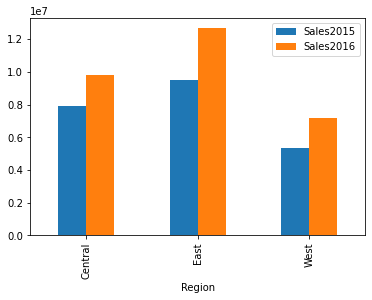

In [73]:
sales.groupby('Region')[['Sales2015', 'Sales2016']].sum().plot(kind= 'bar')
plt.show()

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

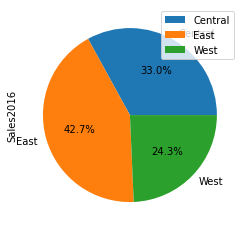

In [51]:
sales.groupby('Region')[['Sales2016']].sum().plot(kind='pie',  subplots= True,autopct='%.1f%%')
plt.show()

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

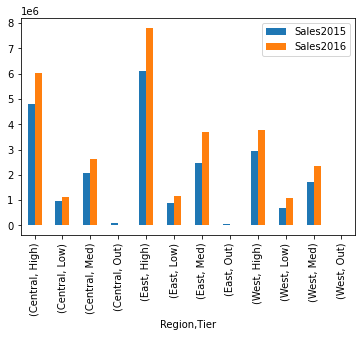

In [57]:
sales.groupby(['Region', 'Tier'])[['Sales2015', 'Sales2016']].sum().plot(kind= 'bar')
plt.show()

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

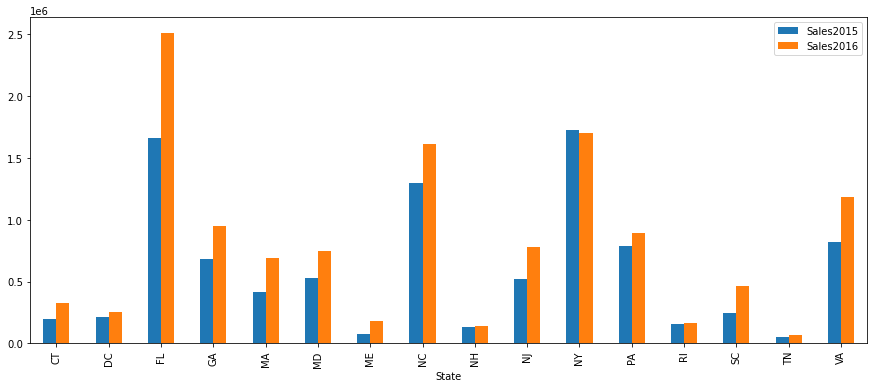

In [105]:
sales.groupby(['Region', 'State'])[['Sales2015', 'Sales2016']].sum().loc['East'].plot(kind= 'bar', figsize= (15,6))
plt.show()

#### NY has seen decline in sales in 2016

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

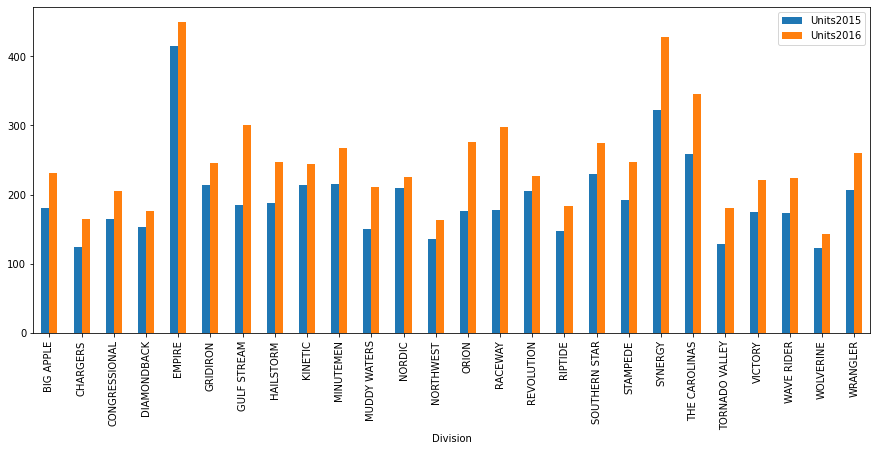

In [112]:
sales.groupby(['Tier', 'Division'])[['Units2015', 'Units2016']].sum().loc['High'].plot(kind= 'bar', figsize=(15,6))
plt.show()

#### There is no division that shows a plunge in units sold

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported  dataset. The Quarters are based on months and defined as - 
#### • Jan - Mar : Q1 ; Apr - Jun  : Q2 ;  Jul - Sep : Q3 ; Oct - Dec : Q4 

In [142]:
sales.loc[(sales.Month == 'Jan') | (sales.Month == 'Feb') | (sales.Month == 'Mar'),'Qtr'] = 'Q1'
sales.loc[(sales.Month == 'Apr') | (sales.Month == 'May') | (sales.Month == 'Jun'),'Qtr'] = 'Q2'
sales.loc[(sales.Month == 'Jul') | (sales.Month == 'Aug') | (sales.Month == 'Sep'),'Qtr'] = 'Q3'
sales.loc[(sales.Month == 'Oct') | (sales.Month == 'Nov') | (sales.Month == 'Dec'),'Qtr'] = 'Q4'

In [145]:
sales.head(2)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

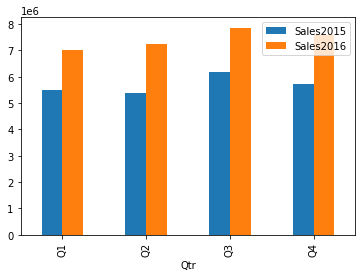

In [180]:
sales.groupby(by= 'Qtr')[['Sales2015', 'Sales2016']].sum().plot(kind= 'bar')
plt.show()

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [165]:
sales.groupby(by= ['Qtr','Tier'])[ ['Sales2016']].sum()

Sales2016
Qtr Tier              
Q1  High  3.867719e+06
    Low   9.488328e+05
    Med   2.181402e+06
    Out   0.000000e+00
Q2  High  4.130953e+06
    Low   8.905948e+05
    Med   2.215814e+06
    Out   0.000000e+00
Q3  High  4.872559e+06
    Low   7.951777e+05
    Med   2.197058e+06
    Out  -3.248530e+03
Q4  High  4.740002e+06
    Low   7.426594e+05
    Med   2.085207e+06
    Out   0.000000e+00

In [175]:
q8= sales.pivot_table(index= 'Qtr', columns= 'Tier', values= 'Sales2016', aggfunc= sum)
q8

Tier,High,Low,Med,Out
Qtr,,,,
Q1,3867718.595,948832.77,2.181402e+06,0.00
Q2,4130952.560,890594.75,2.215814e+06,0.00
Q3,4872559.250,795177.71,2.197058e+06,-3248.53
Q4,4740001.985,742659.39,2.085207e+06,0.00


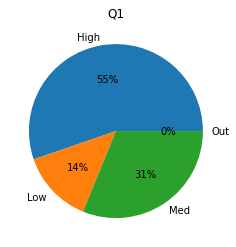

In [181]:
plt.pie(x= q8.loc['Q1',:],autopct="%1.0f%%",labels=["High","Low","Med","Out"])
plt.title('Q1')
plt.show()

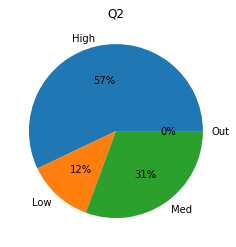

In [182]:
plt.pie(x= q8.loc['Q2',:],autopct="%1.0f%%",labels=["High","Low","Med","Out"])
plt.title('Q2')
plt.show()

ValueError: Wedge sizes 'x' must be non negative values

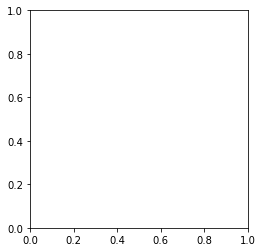

In [183]:
plt.pie(x= q8.loc['Q3',:],autopct="%1.0f%%",labels=["High","Low","Med","Out"])
plt.title('Q3')
plt.show()

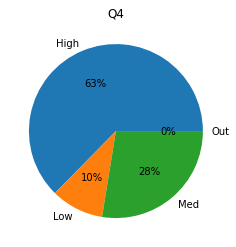

In [184]:
plt.pie(x= q8.loc['Q4',:],autopct="%1.0f%%",labels=["High","Low","Med","Out"],)
plt.title('Q4')
plt.show()